### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # seaborn is based on matplotlib

pd.options.display.float_format = '{:.1f}'.format

sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [31]:
user_ratings_df = pd.read_csv('Data.csv')
movies_df = pd.read_csv('item.csv')
users_df = pd.read_csv('user.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [32]:
def get_df_info(df, name):
    print('----------{} DF Info-------------'.format(name))
    print(df.info())
    print('------------------------------')
    print('{0} shape: {1}'.format(name, df.shape))
    print('------------------------------')
    print('Number of missing values for {0}: {1}'.format(name, df.isnull().sum().sum()))
    print('----------{} DF Describe-------------'.format(name))
    print(df.describe())
    print('------------------------------')

get_df_info(user_ratings_df, 'User Ratings')
get_df_info(movies_df, 'Movies')
get_df_info(users_df, 'Users')

----------User Ratings DF Info-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None
------------------------------
User Ratings shape: (100000, 4)
------------------------------
Number of missing values for User Ratings: 0
----------User Ratings DF Describe-------------
       user id  movie id   rating   timestamp
count 100000.0  100000.0 100000.0    100000.0
mean     462.5     425.5      3.5 883528851.5
std      266.6     330.8      1.1   5343856.2
min        1.0       1.0      1.0 874724710.0
25%      254.0     175.0      3.0 879448709.5
50%      447.0     322.0      4.0 882826944.0
75%      682.0     631.0      4.0 888259984.0
max      943.0 

#### 4. Find the number of movies per genre using the item data - 5 marks

In [33]:
# use sum on the default axis

movies_df.sum()

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

#### 5. Find the movies that have more than one genre - 2.5 marks

In [34]:
#hint: use sum on the axis = 1

columns = list(movies_df)
genres = columns[3:]

movies_df[movies_df[genres].sum(axis=1) > 1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1669,MURDER and murder,20-Jun-1997,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1668,1670,Tainted,01-Feb-1998,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1671,1673,Mirage,01-Jan-1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [35]:
movies_df = movies_df[movies_df.unknown == 0]

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [36]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [37]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


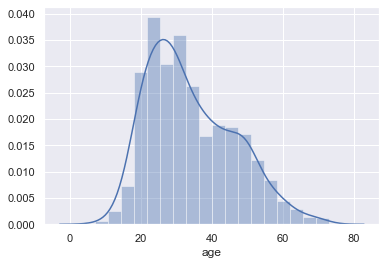

In [38]:
#your answers here
sns.distplot(users_df.age);

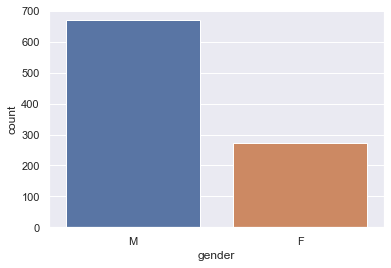

In [39]:
sns.countplot(users_df.gender);

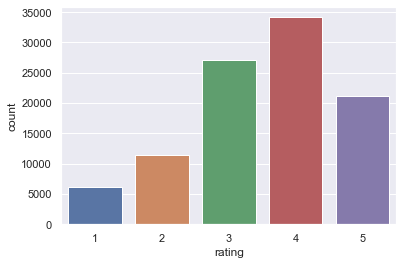

In [40]:
sns.countplot(user_ratings_df.rating);

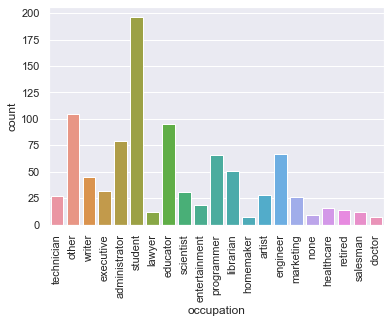

In [41]:
occupation_plot = sns.countplot(users_df.occupation)
occupation_plot.set_xticklabels(occupation_plot.get_xticklabels(), rotation=90);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

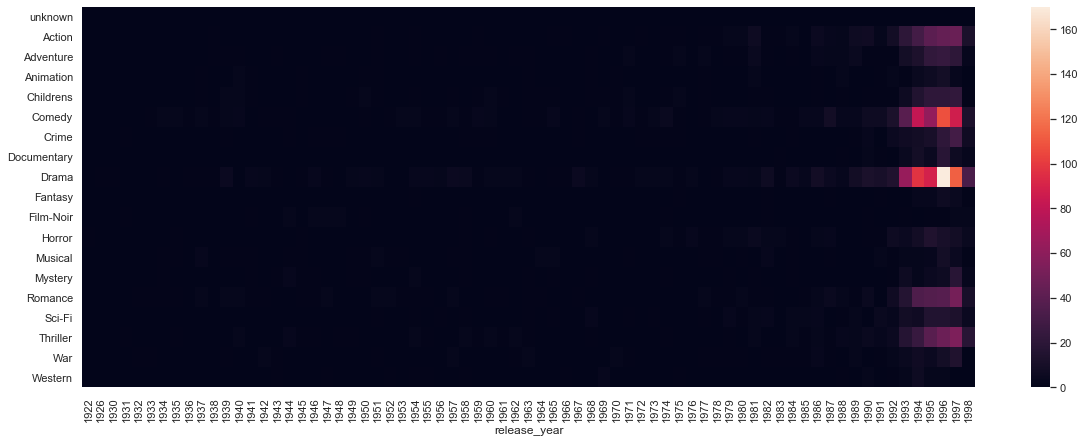

In [53]:
#Your answer here
plt.figure(figsize=(20,7))
movies_df['release_year'] = movies_df['release date'].apply(lambda release_date: release_date.split('-')[2]) 
genre_years_sum = movies_df[genres + ['release_year']].sort_values('release_year').groupby(['release_year']).sum()
sns.heatmap(genre_years_sum.T);

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [56]:
#your answer here

movie_ratings_df = pd.merge(user_ratings_df, movies_df, on="movie id", how="inner")
movie_title_group = movie_ratings_df.groupby('movie title')

high_rated_titles = list(movie_title_group.filter(lambda x: x['rating'].count() > 100).groupby('movie title')['rating'].count().index)
movie_ratings_df[movie_ratings_df['movie title'].isin(high_rated_titles)]

top_title_group = movie_ratings_df[movie_ratings_df['movie title'].isin(high_rated_titles)].groupby('movie title')
top_title_group['rating'].mean().sort_values(ascending=False).head(25)

movie title
Close Shave, A                                                          4.5
Schindler's List                                                        4.5
Wrong Trousers, The                                                     4.5
Casablanca                                                              4.5
Shawshank Redemption, The                                               4.4
Rear Window                                                             4.4
Usual Suspects, The                                                     4.4
Star Wars                                                               4.4
12 Angry Men                                                            4.3
Citizen Kane                                                            4.3
To Kill a Mockingbird                                                   4.3
One Flew Over the Cuckoo's Nest                                         4.3
Silence of the Lambs, The                                               4.3


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [44]:
movie_ratings_df = pd.merge(user_ratings_df, movies_df, on="movie id", how="inner")
movielens_df = pd.merge(movie_ratings_df, users_df, on="user id", how="inner")
movielens_df.head()

total_ratings_by_men = len(movielens_df[movielens_df['gender'] == "M"])
total_ratings_by_women = len(movielens_df[movielens_df['gender'] == "F"])

drama_movies = movielens_df[movielens_df['Drama'] == True]
drama_movies_watched_by_men = movielens_df[(movielens_df['Drama'] == True) & (movielens_df['gender'] == "M")]
drama_movies_watched_by_women = movielens_df[(movielens_df['Drama'] == True) & (movielens_df['gender'] == "F")]

percentage_of_drama_watched_by_men = (len(drama_movies_watched_by_men) / total_ratings_by_men) * 100
percentage_of_drama_watched_by_women = (len(drama_movies_watched_by_women) / total_ratings_by_women) * 100

print('{:.2f}% of men watch Drama'.format(percentage_of_drama_watched_by_men))
print('{:.2f}% of women watch Drama'.format(percentage_of_drama_watched_by_women))
print('--------------------------------------------')
print('Men watch more drama than women: {}'.format(percentage_of_drama_watched_by_men > percentage_of_drama_watched_by_women))
print('')

scifi_movies = movielens_df[movielens_df['Sci-Fi'] == True]
scifi_movies_watched_by_men = movielens_df[(movielens_df['Sci-Fi'] == True) & (movielens_df['gender'] == "M")]
scifi_movies_watched_by_women = movielens_df[(movielens_df['Sci-Fi'] == True) & (movielens_df['gender'] == "F")]

percentage_of_scifi_watched_by_men = (len(scifi_movies_watched_by_men) / total_ratings_by_men) * 100
percentage_of_scifi_watched_by_women = (len(scifi_movies_watched_by_women) / total_ratings_by_women) * 100

print('{:.2f}% of men watch Sci-Fi'.format(percentage_of_scifi_watched_by_men))
print('{:.2f}% of women watch Sci-Fi'.format(percentage_of_scifi_watched_by_women))
print('--------------------------------------------')
print('Women watch more Sci-Fi than men: {}'.format(percentage_of_scifi_watched_by_women > percentage_of_scifi_watched_by_men))
print('')

romance_movies = movielens_df[movielens_df['Romance'] == True]
romance_movies_watched_by_men = movielens_df[(movielens_df['Romance'] == True) & (movielens_df['gender'] == "M")]
romance_movies_watched_by_women = movielens_df[(movielens_df['Romance'] == True) & (movielens_df['gender'] == "F")]

percentage_of_romance_watched_by_men = (len(romance_movies_watched_by_men) / total_ratings_by_men) * 100
percentage_of_romance_watched_by_women = (len(romance_movies_watched_by_women) / total_ratings_by_women) * 100

print('{:.2f}% of men watch Romance'.format(percentage_of_romance_watched_by_men))
print('{:.2f}% of women watch Romance'.format(percentage_of_romance_watched_by_women))
print('--------------------------------------------')
print('Men watch more Romance than women: {}'.format(percentage_of_romance_watched_by_men > percentage_of_romance_watched_by_women))
print('')


38.90% of men watch Drama
42.77% of women watch Drama
--------------------------------------------
Men watch more drama than women: False

13.60% of men watch Sci-Fi
10.21% of women watch Sci-Fi
--------------------------------------------
Women watch more Sci-Fi than men: False

18.32% of men watch Romance
22.76% of women watch Romance
--------------------------------------------
Men watch more Romance than women: False



In [63]:
genre_by_gender = movielens_df.groupby('gender').sum()
genre_by_gender.head()

,user id,movie id,rating,timestamp,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age
gender,,,,,,,,,,,,,,,,,,,,,
F,12225832,11452645,90894,22748573259055,0,5442,3141,995,2232,8068,...,385,1197,1442,1314,5858,2629,5086,2189,371,831719
M,34019655,31096592,262060,65595552186588,0,20147,10612,2610,4950,21764,...,1348,4120,3512,3931,13603,10101,16786,7209,1483,2464992
